# Overview

## Data
This is a dataset for binary sentiment classification. We provide a set of 50,000 highly polar movie reviews for training and testing. 



## To do
Take the provided dataset and solve the binary classification task.<br>
Target – sentiment pos/neg 


## Evaluation 
Metric AUC-ROC with **visualisation**


## Libraries
- scikit‑learn
- NLTK



In [ ]:
#import library

import pandas as pd
import numpy as np

# !pip install NLTK
import nltk
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
import re
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer 


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

%matplotlib inline
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# #Loading dataset from csv
# df = pd.read_csv("LargeMovieReviewDataset.csv")

# # df.style.set_properties(**{'white-space': 'pre'})

# #check the first 5 rows
# df.head(10)

In [ ]:
from google.colab import files
uploaded = files.upload()

# File CSV for sharing & download to upload: https://drive.google.com/file/d/1qkw-qMP2V5smJiCjdfBtdB8fjjJbXqKH/view?usp=sharing

Saving LargeMovieReviewDataset.csv to LargeMovieReviewDataset (1).csv


In [ ]:
#Loading dataset from csv

import io
df = pd.read_csv(io.BytesIO(uploaded["LargeMovieReviewDataset.csv"]))

#check the first 5 rows
df.head()

review  \
0  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
df.tail(10)

review  \
49990                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Lame, lame, lame!!! A 90-minute cringe-fest that's 89 minutes too long. A setting ripe with atmosphere and possibility (an abandoned convent) is squandered by a stinker of a script filled with clunky, witless dialogue that's straining oh-so-hard to be hip. Mostly it's just embarrassing, and the attempts at gonzo horror fall flat (a sample of this movie's dialogue: after demonstrating her artillery, fast dolly shot to a closeup of Barbeau's vigilante character
she: `any questions?' hyuck hyuck hyuck). Bad acting, idiotic, homophobic jokes and judging from the creature effects, it looks like the director's watched `The Evil Dead' way too many times. <br /><br />I owe my friends big time for renting this turkey and subjecting them to ninety wasted minutes they'll never get back. What a turd.   
49991                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Les Visiteurs, the first movie about

In [ ]:
#Inspect number of rows and columns
df.shape

(50000, 2)

In [ ]:
#Further inspect the data info/structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# To check if there are any NaN values

df.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
# Because the target variable is quite equally distributed, so it doesn't has to be removing the duplicates as the impact is not large
# However to get a more accurate and less noise prediction, since the data distribution is well balance even removed the duplicates so I went ahead.

print(df.duplicated().sum())

df.loc[df.duplicated(keep = False)]
df.drop_duplicates(keep='first',inplace=True)

418


In [ ]:
# Reinspect the numbers of row and column after removed duplicates
df.shape

(49582, 2)

In [ ]:
#Check the value counts of the target variables

df["sentiment"].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

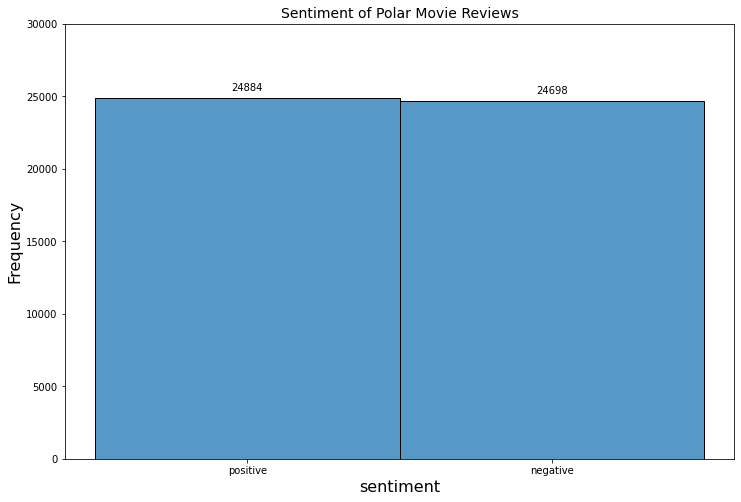

In [ ]:
#Review them in visualization for better comparison

fig = plt.figure(figsize=(12,8))

ax = sns.histplot(x="sentiment", data=df)

for value in ax.patches:
    height = value.get_height()
    ax.annotate(f'{int(height)}', xy=(value.get_x()+value.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 


plt.xlabel("sentiment", size=16)
plt.ylabel("Frequency", size=16)
plt.ylim(0,30000)
# plt.bar_label(ax.containers[0])

  
# title    
plt.title("Sentiment of Polar Movie Reviews", fontsize=14)
# # To hide the grid that was shown 
# ax.grid(False)

plt.show()

As we can see from the histogram plot above, the count of our binary target variables is almost equally distributed even after removed the duplicated rows. So our dataset is consider well balanced.

---

## Text Preprocessing/ Data Cleaning

Next we will be running some of the following pre-processing steps to further data cleaning our dataset.

- Cleaning - 1
    - Remove whitespace
    - Remove HTML tags
    - Change texts to lowercase
    - Remove punctuation
- Tokenization - 1
    - Remove stopwords
- Normalisation (comparison of stemming and lemmatization) - 1

#### Convert to lowercase

In [ ]:
#change all texts to lowercase

df["review"] = df["review"].str.lower()

#### Remove leading and ending whitespace

In [ ]:
# Remove leading and ending whitespace under "review" column

df.replace(r"^ +| +$", r"", regex=True, inplace=True)

In [ ]:
#check if any whitespace under "sentiment" column

df["sentiment"].str.isspace().sum()

0

#### Remove HTML tags

In [ ]:
# Remove HTML tags
df["review"] = df["review"].str.replace(r"<[^<>]*>", " ", regex=True)

# < - a < char
# [^<>]* - zero or more chars ther than < and > as many as possible
# > - a > char.

In [ ]:
# quick glance after removed all the HTML tags

df.head(10)

review  \
0  one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.  the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.  it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.  i would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. forget pretty pictures painted for mainstream audiences, forget charm, forget romance...oz doesn't mess around. the first episode i ever saw struck me as so nasty it was surreal, i couldn't say i was ready for it, but as i watched more, i developed a taste for oz, and got accustomed to the high levels of graphic violence. not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) watching oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             a wonderful little production.   the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece.   the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master's of comedy and his life.   the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell's murals decorating every surface) are terribly well done.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

#### Remove punctuation and odd symbols (underscore that is no meanings)

In [ ]:
#look for words and spaces, then compiled them into a new variable/list. So that punctuation will not be inclusive
punct = re.compile(r'[^\w\s]+') 

#Then put them into list and overwrite the original review column
df['review'] = [punct.sub(' ', x) for x in df['review'].tolist()] 

In [ ]:
#Noticed there are some underscore in the raw dataset, so next is to try remove them and makes the data cleaner
df[df["review"].str.contains("____________")].head()

review  \
1438                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                i will divide my review into following 5 categories each accounting a maximum of 100 if perfect  ________________________________________________________________   visual pleasure 100  this is extremely pleasing movie visually  i had a great time watching it  golfing scenes are very well shot and the dramatic effects on the green were quite amazing  i also loved seeing the old wooden golf clubs and the bag   director s work 70  bill paxton is more associated to acting but this film shows he s got talent  did a decent job   acting 90  shia lebeouf was very good in his role of francis ouimet this guy can act well  the rest of the cast was also good   entertainment value 100  i enjoyed every minute of it  it was overwhelmingly entertaining   script 91  based on a true story and therefore it makes the film that much more special  it was intriguing right from the start and loved every scene till the very end   __________________________________________________________________   my advice  definitely a must watch for all the sports lovers especially golf you all will love it  anyone who is looking for a nice entertaining movie and doesn t hate sports can watch it    _____   10 10   
2226   this very peculiar setting of wagner s last opera definitely grew on me  when i first saw it  i was somewhat annoyed by many of the films surrealistic images  and felt that far too much was superimposed upon the story  however  if you can put up with a fair amount of rather recherché  gimmicks  i think you will find that the film does manage to capture the very strange  other worldly atmosphere of the opera  and that there are moments which are particularly fine   personally  i never really understood the role of kundry until i saw how edith clever portrayed her  her performance  a lip synchronized mime of the singing voice of yvonne minton  is nothing short of dazzling  from end to end  and alone justifies the hours it takes to absorb the film   another reason to delight in this film is that it captures the spectacular interpretation of robert lloyd of the crucial role of gurnemanz  one which lloy

In [ ]:
#Remove underscores
underscore = re.compile(r'[\W_]')

df['review'] = df['review'].replace(underscore,' ') 

In [ ]:
#Double check if any underscore remains
df[df['review'] .str.contains("_______")]

Empty DataFrame
Columns: [review, sentiment]
Index: []

In [ ]:
#Select 1 of the data from above to confirm the underscore has been removed
df['review'].iloc[2226]

'this very peculiar setting of wagner s last opera definitely grew on me  when i first saw it  i was somewhat annoyed by many of the films surrealistic images  and felt that far too much was superimposed upon the story  however  if you can put up with a fair amount of rather recherché  gimmicks  i think you will find that the film does manage to capture the very strange  other worldly atmosphere of the opera  and that there are moments which are particularly fine   personally  i never really understood the role of kundry until i saw how edith clever portrayed her  her performance  a lip synchronized mime of the singing voice of yvonne minton  is nothing short of dazzling  from end to end  and alone justifies the hours it takes to absorb the film   another reason to delight in this film is that it captures the spectacular interpretation of robert lloyd of the crucial role of gurnemanz  one which lloyd has performed to a crisp at opera houses throughout the world  i have been privileged 

In [ ]:
#because we replaced the underscore with a space, it creates a lot of extra whitespace so here we removing those extra whitespaces 

extra_space = re.compile(r' +') 

df['review'] = [extra_space.sub(' ', x) for x in df['review'].tolist()] 

In [ ]:
#here we pick the same as above to inspect and we can see the data looks a lot better now.
df['review'].iloc[2226]

'this very peculiar setting of wagner s last opera definitely grew on me when i first saw it i was somewhat annoyed by many of the films surrealistic images and felt that far too much was superimposed upon the story however if you can put up with a fair amount of rather recherché gimmicks i think you will find that the film does manage to capture the very strange other worldly atmosphere of the opera and that there are moments which are particularly fine personally i never really understood the role of kundry until i saw how edith clever portrayed her her performance a lip synchronized mime of the singing voice of yvonne minton is nothing short of dazzling from end to end and alone justifies the hours it takes to absorb the film another reason to delight in this film is that it captures the spectacular interpretation of robert lloyd of the crucial role of gurnemanz one which lloyd has performed to a crisp at opera houses throughout the world i have been privileged to enjoy him in the r

In [ ]:
# Here we can also see all punctuation is now gone

df.head(10)

review  \
0  one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare forget pretty pictures painted for mainstream audiences forget charm forget romance oz doesn t mess around the first episode i ever saw struck me as so nasty it was surreal i couldn t say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards who ll be sold out for a nickel inmates who ll kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewing thats if you can get in touch with your darker side    
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done    
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

#### Remove numbers/digits

In [ ]:
#Removing numbers/digits

df['review'] = df['review'].str.replace(r'\d+','', regex=True)

#### Tokenize our data

In [ ]:
#Tokenization our data

df['tokenized_review'] = df.apply(lambda row: nltk.word_tokenize(row['review']), axis=1)

Next is to remove the stopwords. At the begining the stopwords library in NLTK was not good enough to clean all the stopwords in this dataset. After some research, I found this customized library and it has a lot more useful stopwords that required for this dataset so I picked that up and apply here.

#### Remove Stopwords

In [ ]:
import requests
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stopwords = set(stopwords_list.decode().splitlines()) 

df['review_wo_stopwords'] = df['tokenized_review'].apply(lambda x: [word for word in x if word not in stopwords])

In [ ]:
df.head()

review  \
0  one of the other reviewers has mentioned that after watching just  oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare forget pretty pictures painted for mainstream audiences forget charm forget romance oz doesn t mess around the first episode i ever saw struck me as so nasty it was surreal i couldn t say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards who ll be sold out for a nickel inmates who ll kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewing thats if you can get in touch with your darker side    
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done    
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

From the above new look of the data frame, we can see under the review_wo_stopwords column shows the tokens a lot better where many unmeaningful or useless words/stopwords are removed. This shows the customised stopwords library cleaned and made the review data more concise.

### Text Normalization process

As we have cleaned up the data from unnecessary words, symbols or punctuations. Now we moving to the next step which is text normalization

In [ ]:
wnl = nltk.stem.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {
                    'CD':wn.NOUN, # cardinal number (one, two)                             
                    'EX':wn.ADV, # existential ‘there’ (there)                      
                    'IN':wn.ADV, # preposition/sub-conj (of, in, by)   
                    'JJ':wn.ADJ, # adjective (yellow)                  
                    'JJR':wn.ADJ, # adj., comparative (bigger)          
                    'JJS':wn.ADJ, # adj., superlative (wildest)                            
                    'NN':wn.NOUN, # noun, sing. or mass (llama)          
                    'NNS':wn.NOUN, # noun, plural (llamas)                  
                    'NNP':wn.NOUN, # proper noun, sing. (IBM)              
                    'NNPS':wn.NOUN, # proper noun, plural (Carolinas)
                    'PDT':wn.ADJ, # predeterminer (all, both)             
                    'RB':wn.ADV, # adverb (quickly, never)            
                    'RBR':wn.ADV, # adverb, comparative (faster)        
                    'RBS':wn.ADV, # adverb, superlative (fastest)     
                    'RP':wn.ADJ, # particle (up, off)
                    'VB':wn.VERB, # verb base form (eat)
                    'VBD':wn.VERB, # verb past tense (ate)
                    'VBG':wn.VERB, # verb gerund (eating)
                    'VBN':wn.VERB, # verb past participle (eaten)
                    'VBP':wn.VERB, # verb non-3sg pres (eat)
                    'VBZ':wn.VERB, # verb 3sg pres (eats)
                }
    
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 




In [ ]:
%%time

df["lemma_review"] = df["review_wo_stopwords"].apply(
                    lambda lst:[wnl.lemmatize(word, pos=penn2morphy(tag)) for word, tag in pos_tag(lst)])
# print(df['lemma_review'])

CPU times: user 5min 32s, sys: 1.8 s, total: 5min 34s
Wall time: 5min 34s


In [ ]:
df.head()

review  \
0  one of the other reviewers has mentioned that after watching just  oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare forget pretty pictures painted for mainstream audiences forget charm forget romance oz doesn t mess around the first episode i ever saw struck me as so nasty it was surreal i couldn t say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards who ll be sold out for a nickel inmates who ll kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewing thats if you can get in touch with your darker side    
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done    
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Between Stemming and Lemmatization, I decided to use Lemmatization for this dataset. <br>
<br>
Stemming is a process that reduces words to their word root word or chops off the derivational affixes. It could be useful enough, but our dataset heavily depends on the texts/words as movie reviews. It could be risky if we stemmed all the words and caused some of the key wordings not to make any good sense by the algorithm, and it could cause some discrepancies during the training.<br>
<br>
Whereas, Lemmatization reduces words to their base word. It transforms root words with the use of vocabulary and morphological analysis. This process is usually more sophisticated than stemming because Stemmer works on an individual word without knowing the context.

After Lemmatized the data, reinspect the dataset, rulling out all word tokens length that is not more than 2 characters and removed them as they are unlikely to have any meaningful to the dataset.

In [ ]:
for x in df["lemma_review"]:
    for i in x:
        if (len(i)<=2):
            print(i)
            x.remove(i)


Streaming output truncated to the last 5000 lines.
dy
dy
jd
jd
pg
ya
jp
as
pg
ma
ma
dy
as
fx
uh
cu
bo
bo
ww
ha
ta
uh
ta
vw
as
pg
uh
ka
jo
pb
mp
mp
ww
li
lb
lp
as
ks
dy
hr
hd
hr
dy
d
pg
fx
fx
as
y
ax
je
jc
jc
li
ww
ja
ja
fx
pt
so
md
cb
te
sg
mm
pg
kk
kk
kk
da
as
ww
ta
eh
ld
de
de
mj
mj
ya
bo
eh
xu
as
ha
gu
gu
hm
nu
ha
pg
jo
fx
vw
pg
bo
vr
uh
as
as
as
ta
as
ta
hr
fx
pg
gf
dy
gu
dy
jo
ld
ta
mi
fx
mm
mm
yr
uh
¾
ha
as
ta
jo
jo
jo
fx
gv
ai
pg
as
gw
aa
gw
oy
co
co
hk
cb
md
ly
wb
wb
su
su
bo
as
dy
zp
jo
jo
hr
eh
zu
in
ha
ta
qm
qm
dh
as
pg
dy
dy
ya
hg
cd
mp
mp
hm
li
ha
eh
fx
mm
fx
hd
li
li
ku
ku
ta
mp
ya
ew
dv
mm
gf
la
mm
bo
eh
bo
bo
ha
bo
bo
bo
bo
bo
bo
bo
bo
bo
bo
mk
nu
ya
ta
fx
dy
aa
gm
li
ta
ta
ta
dy
dy
ha
ha
ww
jp
dw
vh
po
as
ty
fx
fx
as
dy
sh
mi
ya
pg
pg
mi
eh
fx
ak
an
an
dy
ua
cw
as
pg
oe
as
wb
mo
dy
hg
sh
uh
bo
eh
as
mm
ta
vc
vc
vc
vc
ha
ha
ta
ta
ha
zp
ax
as
pg
hr
in
as
li
ww
dv
dv
yi
fx
bw
bw
vh
ta
up
dy
yo
mm
ub
co
sh
oh
as
hr
jd
pg
ad
vw
hr
lp
vw
uh
nk
nk
nk
ka
eh
pg
pg
ha
ta
dy
dy
l

In [ ]:
print(df.lemma_review[(df.lemma_review.str.len() <= 5)])

8862      [grown, movie, love, early, soundtrack]
9451                         [sandra, year, live]
11926               [rent, dollar, rental, night]
13109              [suspenseful, subtle, disturb]
17587           [great, movie, book, good, movie]
19874             [movie, terrible, good, effect]
20274            [choose, paul, verhoeven, watch]
24940                        [movie, tire, watch]
27521                 [read, book, forget, movie]
27680                  [great, movie, bad, video]
30995                       [great, movie, write]
31072                       [script, story, mess]
31328        [doubt, bad, movie, funny, interest]
31761    [ming, merciless, bardwork, movie, foul]
40817          [hope, group, film, maker, unites]
Name: lemma_review, dtype: object


In [ ]:
#Drop these rows from dataset.

df.drop(df[((df.lemma_review.str.len() < 5))].index, inplace=True)

In [ ]:
#The new numbers of rows and columns for the dataset

df.shape

(49572, 5)

Moving on to next step - find the feature importance/words importance from the data. <br>
<br>
To better start this process and need to reset the indexes, let's create a new dataset just using the lemmatized attribute (lemma_review) and the target variable (sentiment) as below.

In [ ]:
df_new = df[["lemma_review","sentiment"]]
df_new.reset_index(drop=True, inplace=True)
df_new.head()

lemma_review  \
0  [reviewer, mention, watch, episode, hook, happened, thing, strike, brutality, unflinching, scene, violence, set, word, trust, faint, hearted, timid, pull, punch, drug, sex, violence, hardcore, classic, word, call, nickname, oswald, maximum, security, state, penitentary, focus, emerald, city, experimental, prison, cell, glass, front, face, inwards, privacy, high, agenda, city, aryan, muslims, gangsta, latino, christian, italian, irish, scuffle, death, stare, dodgy, dealing, shady, agreement, main, appeal, fact, dare, forget, pretty, picture, paint, mainstream, audience, forget, charm, forget, romance, mess, episode, strike, nasty, surreal, ready, watch, developed, taste, accustom, high, level, graphic, violence, violence, injustice, crook, guard, sell, nickel, inmate, kill, order, mannered, middle, ...]   
1                                                                                                                                                                                                                                                                        [wonderful, production, filming, technique, unassuming, time, bbc, fashion, comfort, discomforting, sense, realism, entire, piece, actor, extremely, choose, michael, sheen, polari, voice, pat, seamless, editing, guide, reference, williams, diary, entry, worth, watch, terrificly, write, perform, piece, masterful, production, great, master, comedy, life, realism, thing, fantasy, guard, traditional, dream, technique, remain, solid, disappears, play, knowledge, sens, scenes, orton, halliwell, set, flat, halliwell, mural, decorate, surface, terribly]   
2                                                                                                                                                                                                                                                                             [think, wonderful, spend, time, hot, summer, weekend, sit, air, condition, theater, watch, light, hearted, comedy, plot, simplistic, dialogue, witty, character, likable, bread, suspect, serial, killer, disappoint, realize, match, point, risk, addiction, think, proof, woody, allen, fully, control, style, grow, love, laugh, woody, comedy, year, dare, decade, impressed, scarlet, johanson, manage, tone, sexy, image, jump, average, spirited, young, woman, crown, jewel, career, witty, devil, wear, prada, interest, superman, great, comedy, friend]   
3                                                                                                                                                                                                                                                                                                                                                                                                                                      [basically, family, boy, jake, think, zombie, closet, parent, fight, time, movie, slow, soap, opera, suddenly, jake, decides, rambo, kill, zombie, film, decide, thriller, drama, drama, movie, watchable, parent, divorce, argue, real, life, jake, closet, totally, ruin, film, expect, boogeyman, movie, watch, drama, meaningless, thriller, spot, play, parent, descent, dialog, shot, jake, ignore]   
4                                                                            [petter, mattei, love, time, money, visually, stunning, film, watch, mattei, offer, vivid, portrait, human, relation, movie, tell, money, power, success, people, situation, encounter, variation, arthur, schnitzler, play, theme, director, transfer, action, time, york, character, meet, connect, connect, person, previous, point, contact, stylishly, film, sophisticated, luxurious, people, live, live, habitat, thing, souls, picture, stage, loneliness, inhabits, big, city, place, human, relation, fulfillment, discern, case, people, encounter, act, good, mattei, direction, steve, buscemi, rosario, dawson, carol, kane, michael,

### Word Cloud Plots

For the view of the frequency of the words in this dataset, let's try to plot a Word Cloud Plot to see the words frequency in a glance.

In [ ]:
# Untokenized lemma_review column in order to input and create the word cloud plot

cloud_text = list(map(' '.join, df_new["lemma_review"])) 


In [ ]:
#Import and preparing for WordCloud
from wordcloud import WordCloud, STOPWORDS

word_cloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                       background_color='black', colormap='Set2', 
                       collocations=False, stopwords = STOPWORDS).generate(' '.join(cloud_text))

word_cloud.generate_from_frequencies

<bound method WordCloud.generate_from_frequencies of <wordcloud.wordcloud.WordCloud object at 0x7ff439465e90>>

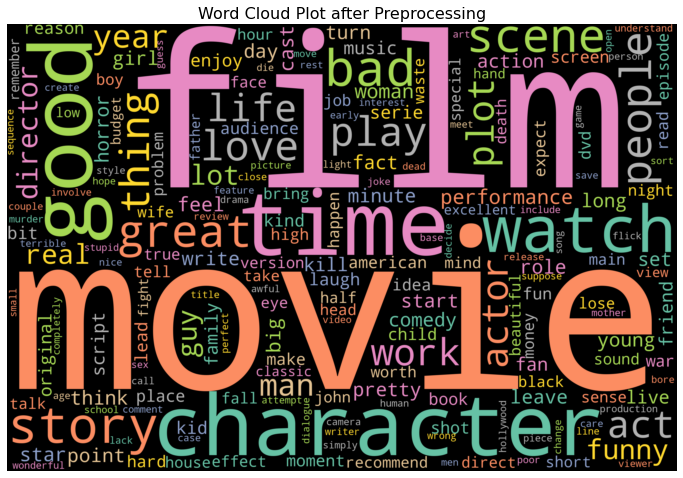

In [ ]:
# Plotting the WordCloud
fig = plt.figure(figsize= (12,10))

plt.imshow(word_cloud, interpolation='bilinear')
plt.title("Word Cloud Plot after Preprocessing", fontsize=16)
plt.axis("off")
plt.show()

From the plot above, we can see that the top 3 most frequence words are **movie, film and time**. Next, **character, good and watch** these 3 words seems to be equally frequnt in out dataset. 

Now that we looked at the word cloud of the reviews as whole in above, let's break down to the **Positive and Negative** sentiment classes and make a comparison between these 2 different sentiment. 

In [ ]:
# Word Cloud for Positive sentiment class
sentiment_positive = df_new[df_new["sentiment"] == "positive"]
cloud_positive = list(map(' '.join, sentiment_positive["lemma_review"])) 

word_cloud_positive = WordCloud(width = 3000, height = 2000, random_state=2, 
                       background_color='black', colormap='rainbow', 
                       collocations=False, stopwords = STOPWORDS).generate(' '.join(cloud_positive))

word_cloud_positive.generate_from_frequencies

<bound method WordCloud.generate_from_frequencies of <wordcloud.wordcloud.WordCloud object at 0x7ff43b0a8e10>>

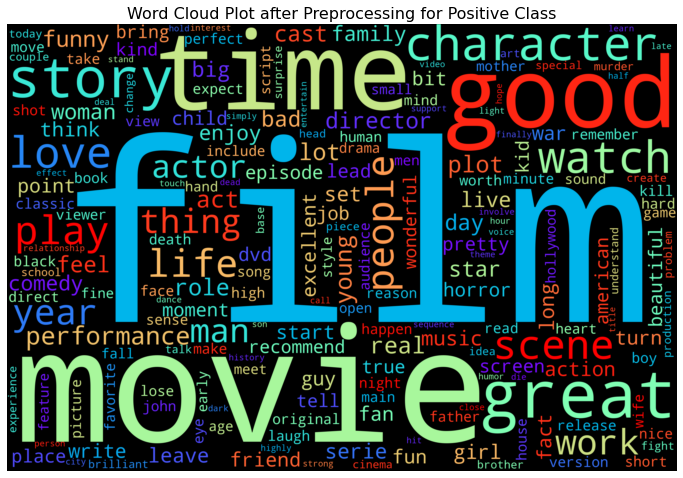

In [ ]:
# Plotting the WordCloud
fig = plt.figure(figsize= (12,10))

plt.imshow(word_cloud_positive, interpolation='bilinear')
plt.title("Word Cloud Plot after Preprocessing for Positive Class", fontsize=16)
plt.axis("off")
plt.show()

In [ ]:
# Word Cloud for Negative sentiment class
sentiment_negative = df_new[df_new["sentiment"] == "negative"]
cloud_negative = list(map(' '.join, sentiment_negative["lemma_review"])) 

word_cloud_negative = WordCloud(width = 3000, height = 2000, random_state=3, 
                       background_color='black', colormap='rainbow', 
                       collocations=False, stopwords = STOPWORDS).generate(' '.join(cloud_negative))

word_cloud_negative.generate_from_frequencies

<bound method WordCloud.generate_from_frequencies of <wordcloud.wordcloud.WordCloud object at 0x7ff4372cda90>>

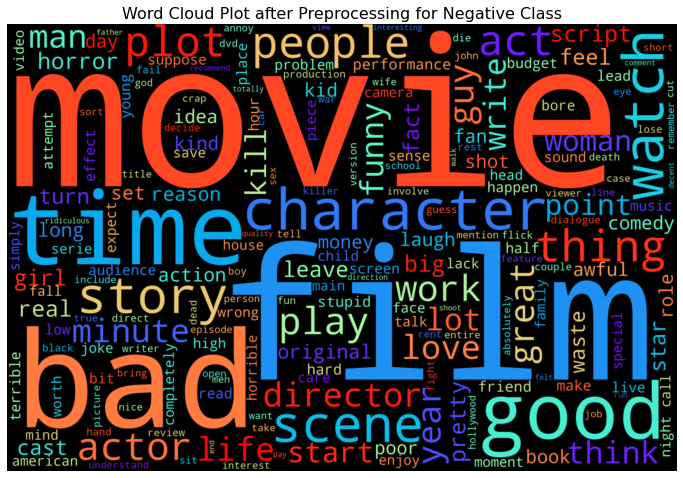

In [ ]:
# Plotting the WordCloud
fig = plt.figure(figsize= (12,10))

plt.imshow(word_cloud_negative, interpolation='bilinear')
plt.title("Word Cloud Plot after Preprocessing for Negative Class", fontsize=16)
plt.axis("off")
plt.show()

As comparison, the top 3 frequence words in both Positive and Negative sentiment classes are the same for **film, movie and time**. <br>
<br>
Then we can see under the **Positive class**, it has more positivity words displayed. Such as "great","excellent", "beautiful", "love" and many more.<br>
<br>
whereas the **Negative class**, it has more negativity words displayed. Such as "bad", "poor", "stupid", "horrible", "awful" and many more.


### Feature Engineering

Using Label Encoding method for our target variable while the review data will be parse into matrix differently.

In [ ]:
#create a copy of the dataset
data = df_new.copy()

In [ ]:
#merge/untokenized the review columns for runs TF-IDF
data["lemma_review"] = [' '.join(map(str, l)) for l in data["lemma_review"]]

In [ ]:
le_sen = LabelEncoder()
le_sen.fit(data["sentiment"])
list(le_sen.classes_)
data["sentiment"]=le_sen.transform(data["sentiment"])

# Using the inverse_transform to check back which index key is which subscribed
list(le_sen.inverse_transform([0, 1]))

['negative', 'positive']

### Train & Test sets Split

In [ ]:
#splitting the data to X - observation groups and Y - targeted output
X = data["lemma_review"]   #.astype(str)
y = data["sentiment"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=200, stratify=y, shuffle=True) 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(34700,) (34700,)
(14872,) (14872,)


### TF-IDF
Here we begain the model training by first fit and transform/normalize the data into matrix using TF-IDF Vectorizer.

In [ ]:
#transform the tf idf vectorizer
tfidf_vect_clf = TfidfVectorizer(max_df=0.50,max_features = 5000)

X_train_tfidf = tfidf_vect_clf.fit_transform(X_train)   #.toarray()
X_vect_terms = tfidf_vect_clf.get_feature_names_out()

# print(list(X_vect_terms))

X_test_tfidf = tfidf_vect_clf.transform(X_test) 

In [ ]:
#Parsing and creates the X train data into DataFrame for review after TFIDF
X_train_vect_names = ['{:d}'.format(idx) for idx, _ in enumerate(X_train_tfidf)]
X_train_vect_data = pd.DataFrame(data=X_train_tfidf.toarray(), index=X_train_vect_names,
                      columns=X_vect_terms)

X_train_vect_data.head()

aaron  abandon  abc  ability  abortion  abound  abraham    abrupt  \
0    0.0      0.0  0.0      0.0       0.0     0.0      0.0  0.000000   
1    0.0      0.0  0.0      0.0       0.0     0.0      0.0  0.000000   
2    0.0      0.0  0.0      0.0       0.0     0.0      0.0  0.000000   
3    0.0      0.0  0.0      0.0       0.0     0.0      0.0  0.000000   
4    0.0      0.0  0.0      0.0       0.0     0.0      0.0  0.114699   

   abruptly  absence  absent  absolute  absolutely  absorb  absurd  absurdity  \
0       0.0      0.0     0.0       0.0    0.000000     0.0     0.0        0.0   
1       0.0      0.0     0.0       0.0    0.000000     0.0     0.0        0.0   
2       0.0      0.0     0.0       0.0    0.114429     0.0     0.0        0.0   
3       0.0      0.0     0.0       0.0    0.000000     0.0     0.0        0.0   
4       0.0      0.0     0.0       0.0    0.000000     0.0     0.0        0.0   

   abuse  abusive  abysmal  academy  accent    accept  acceptable  acceptance  \
0    0.0      0.0      0.0      0.0     0.0  0.000000         0.0         0.0   
1    0.0      0.0      0.0      0.0     0.0  0.000000         0.0         0.0   
2    0.0      0.0      0.0      0.0     0.0  0.000000         0.0         0.0   
3    0.0      0.0      0.0      0.0     0.0  0.134542         0.0         0.0   
4    0.0      0.0      0.0      0.0     0.0  0.083788         0.0         0.0   

   access  accident  accidentally  acclaim  accompany  accomplish  account  \
0     0.0       0.0           0.0      0.0        0.0         0.0      0.0   
1     0.0       0.0           0.0      0.0        0.0         0.0      0.0   
2     0.0       0.0           0.0      0.0        0.0         0.0      0.0   
3     0.0       0.0           0.0      0.0        0.0         0.0      0.0   
4     0.0       0.0           0.0      0.0        0.0         0.0      0.0   

   accuracy  accurate  accurately  accuse  ace  achieve  achievement  acid  \
0       0.0       0.0         0.0     0.0  0.0      0.0          0.0   0.0   
1       0.0       0.0         0.0     0.0  0.0      0.0          0.0   0.0   
2       0.0       0.0         0.0     0.0  0.0      0.0          0.0   0.0   
3       0.0       0.0         0.0     0.0  0.0      0.0          0.0   0.0   
4       0.0       0.0         0.0     0.0  0.0      0.0          0.0   0.0   

   acknowledge  acquire       act  acted  acting  action  active  activity  \
0          0.0      0.0  0.074266    0.0     0.0     0.0     0.0       0.0   
1          0.0      0.0  0.000000    0.0     0.0     0.0     0.0       0.0   
2          0.0      0.0  0.000000    0.0     0.0     0.0     0.0       0.0   
3          0.0      0.0  0.165897    0.0     0.0     0.0     0.0       0.0   
4          0.0      0.0  0.000000    0.0     0.0     0.0     0.0       0.0   

      actor  actress  actresses  actual  adam  adapt  adaptation  add  addict  \
0  0.000000      0.0        0.0     0.0   0.0    0.0         0.0  0.0     0.0   
1  0.000000      0.0        0.0     0.0   0.0    0.0         0.0  0.0     0.0   
2  0.000000      0.0        0.0     0.0   0.0    0.0         0.0  0.0     0.0   
3  0.069889      0.0        0.0     0.0   0.0    0.0         0.0  0.0     0.0   
4  0.130572      0.0        0.0     0.0   0.0    0.0         0.0  0.0     0.0   

   addiction  addition  additional  address  adequate  admirable  admire  \
0        0.0       0.0         0.0      0.0       0.0        0.0     0.0   
1        0.0       0.0         0.0      0.0       0.0        0.0     0.0   
2        0.0       0.0         0.0      0.0       0.0        0.0     0.0   
3        0.0       0.0         0.0      0.0       0.0        0.0     0.0   
4        0.0       0.0         0.0      0.0       0.0        0.0     0.0   

   admirer  admit  admittedly  adolescent  adopt  adorable  adore  adult  \
0      0.0    0.0         0.0         0.0    0.0       0.0    0.0    0.0   
1      0.0    0.0         0.0         0.0    0.0       0.0    0.0    0.0   
2      0.0    0.0

In [ ]:
#Parsing and creates the X test data into DataFrame for review after TFIDF
X_test_vect_names = ['{:d}'.format(idx) for idx, _ in enumerate(X_test_tfidf)]
X_test_vect_data = pd.DataFrame(data=X_test_tfidf.toarray(), index=X_test_vect_names,
                      columns=X_vect_terms)

X_test_vect_data.head()

aaron  abandon  abc  ability  abortion  abound  abraham  abrupt  abruptly  \
0    0.0      0.0  0.0      0.0       0.0     0.0      0.0     0.0       0.0   
1    0.0      0.0  0.0      0.0       0.0     0.0      0.0     0.0       0.0   
2    0.0      0.0  0.0      0.0       0.0     0.0      0.0     0.0       0.0   
3    0.0      0.0  0.0      0.0       0.0     0.0      0.0     0.0       0.0   
4    0.0      0.0  0.0      0.0       0.0     0.0      0.0     0.0       0.0   

   absence  absent  absolute  absolutely  absorb  absurd  absurdity  abuse  \
0      0.0     0.0       0.0         0.0     0.0     0.0        0.0    0.0   
1      0.0     0.0       0.0         0.0     0.0     0.0        0.0    0.0   
2      0.0     0.0       0.0         0.0     0.0     0.0        0.0    0.0   
3      0.0     0.0       0.0         0.0     0.0     0.0        0.0    0.0   
4      0.0     0.0       0.0         0.0     0.0     0.0        0.0    0.0   

    abusive  abysmal  academy  accent  accept  acceptable  acceptance  access  \
0  0.000000      0.0      0.0     0.0     0.0         0.0         0.0     0.0   
1  0.000000      0.0      0.0     0.0     0.0         0.0         0.0     0.0   
2  0.000000      0.0      0.0     0.0     0.0         0.0         0.0     0.0   
3  0.000000      0.0      0.0     0.0     0.0         0.0         0.0     0.0   
4  0.132329      0.0      0.0     0.0     0.0         0.0         0.0     0.0   

   accident  accidentally  acclaim  accompany  accomplish  account  accuracy  \
0       0.0           0.0      0.0        0.0         0.0      0.0       0.0   
1       0.0           0.0      0.0        0.0         0.0      0.0       0.0   
2       0.0           0.0      0.0        0.0         0.0      0.0       0.0   
3       0.0           0.0      0.0        0.0         0.0      0.0       0.0   
4       0.0           0.0      0.0        0.0         0.0      0.0       0.0   

   accurate  accurately  accuse  ace   achieve  achievement  acid  \
0       0.0         0.0     0.0  0.0  0.000000          0.0   0.0   
1       0.0         0.0     0.0  0.0  0.000000          0.0   0.0   
2       0.0         0.0     0.0  0.0  0.142027          0.0   0.0   
3       0.0         0.0     0.0  0.0  0.057153          0.0   0.0   
4       0.0         0.0     0.0  0.0  0.000000          0.0   0.0   

   acknowledge  acquire       act  acted  acting  action  active  activity  \
0          0.0      0.0  0.078668    0.0     0.0     0.0     0.0       0.0   
1          0.0      0.0  0.000000    0.0     0.0     0.0     0.0       0.0   
2          0.0      0.0  0.000000    0.0     0.0     0.0     0.0       0.0   
3          0.0      0.0  0.000000    0.0     0.0     0.0     0.0       0.0   
4          0.0      0.0  0.000000    0.0     0.0     0.0     0.0       0.0   

     actor   actress  actresses  actual  adam  adapt  adaptation  add  addict  \
0  0.00000  0.129811        0.0     0.0   0.0    0.0         0.0  0.0     0.0   
1  0.08604  0.000000        0.0     0.0   0.0    0.0         0.0  0.0     0.0   
2  0.06930  0.000000        0.0     0.0   0.0    0.0         0.0  0.0     0.0   
3  0.00000  0.043692        0.0     0.0   0.0    0.0         0.0  0.0     0.0   
4  0.00000  0.000000        0.0     0.0   0.0    0.0         0.0  0.0     0.0   

   addiction  addition  additional  address  adequate  admirable  admire  \
0        0.0       0.0    0.000000      0.0       0.0        0.0     0.0   
1        0.0       0.0    0.000000      0.0       0.0        0.0     0.0   
2        0.0       0.0    0.182363      0.0       0.0        0.0     0.0   
3        0.0       0.0    0.000000      0.0       0.0        0.0     0.0   
4        0.0       0.0    0.000000      0.0       0.0        0.0     0.0   

   admirer  admit  admittedly  adolescent  adopt  adorable  adore  adult  \
0      0.0    0.0         0.0         0.0    0.0       0.0    0.0    0.0   
1      0.0    0.0         0.0         0.0    0.0       0.0    0.0    0.0   
2      0.0    0.0         0.0

#### As I like to see the top values/ high frequency of the words in the dataset, so plotting another word cloud to visualize it.

In [ ]:
#Setting new classifier to different from the model training version
tfidf_vect_impt = TfidfVectorizer(max_df=0.50,max_features = 5000)

X_tfidf = tfidf_vect_impt.fit_transform(X)
X_terms = tfidf_vect_impt.get_feature_names_out()


feature_array = np.array(X_terms)

tfidf_sorting = np.argsort(X_tfidf.toarray()).flatten()[::-1]

n = 10
top_n = feature_array[tfidf_sorting][:n]

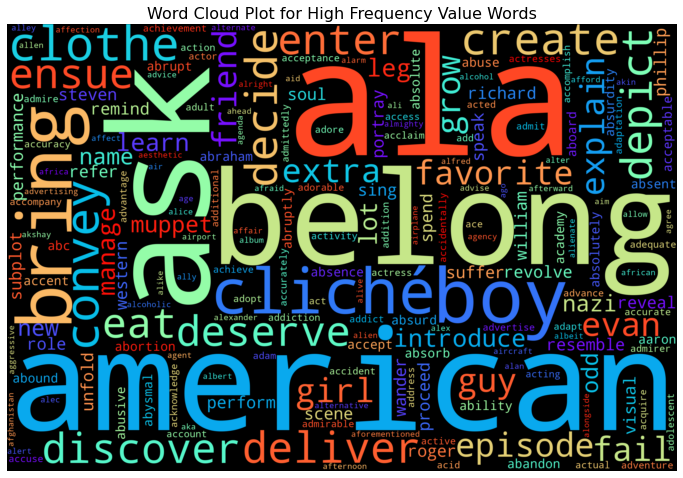

In [ ]:
word_cloud_impt = WordCloud(width = 3000, height = 2000, random_state=3, 
                       background_color='black', colormap='rainbow', 
                       collocations=False, stopwords = STOPWORDS).generate(' '.join(X_terms))

word_cloud_impt.generate_from_frequencies


fig = plt.figure(figsize= (12,10))

plt.imshow(word_cloud_impt, interpolation='bilinear')
plt.title("Word Cloud Plot for High Frequency Value Words", fontsize=16)
plt.axis("off")
plt.show()

Quite an interesting result. We could be mixtures of positive and negative words and some words that it does not have much meaning by itself but frequently used int he reviews.<br>
<br>
There are also some names, might be the actors or the name of the characters in the movie where audiences are either giving good or bad reviews specifically on them.

---

## Models Training and Tuning

Next up will begin our Models training and hyperparameters tuning to assess and improve the performance

- Hyperparameters tuning
- Compare performance of models
    - SGDClassifier
    - Naive Bayes
    - Support Vector Machines (SVM)

#### <ins> Model Training</ins>

#### Stochastic Gradient Descent

Next, training the new transformed dataset with SGDClassifier. Over here we are merely compute it at the basic manner, no params being used.

In [ ]:
%%time

sgd_clf = SGDClassifier()
sgd_fit = sgd_clf.fit(X_train_tfidf, y_train)

# predict the labels on validation dataset
sgd_predict= sgd_fit.predict(X_test_tfidf)

CPU times: user 210 ms, sys: 0 ns, total: 210 ms
Wall time: 209 ms


In [ ]:
%%time

# Use accuracy_score function to get the accuracy
sgd_accuracy_score = accuracy_score(sgd_predict, y_test)
print("Accuracy Score for SGDClassifier = {:.2f}%".format(sgd_accuracy_score*100))

Accuracy Score for SGDClassifier = 87.20%
CPU times: user 3.79 ms, sys: 0 ns, total: 3.79 ms
Wall time: 3.8 ms


In [ ]:
print(classification_report(y_test, sgd_predict))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7408
           1       0.86      0.89      0.87      7464

    accuracy                           0.87     14872
   macro avg       0.87      0.87      0.87     14872
weighted avg       0.87      0.87      0.87     14872



As we can see from the results, the SGDClassifier perform pretty well and almost get to 90% of the accuracy. Based from the Classification report, we can see the evaluation methods of precision, recall and f1-score are showing quite promissing results of prediction with using SGDClassifier

#### Naive Bayes - MultinomialNB

Next, training the new transformed dataset with MultinomialNB. The reason choose **MultinomialNB** instead of GaussianNB or BernoulliNB is mainly because MultinomialNB is use mostly for text data/discrete data with frequency which is the most perfect classifier for this data case. <br>
<br>
Over here we are merely compute it at the basic manner, no params being used.

In [ ]:
%%time

nb_clf = MultinomialNB()
nb_fit = nb_clf.fit(X_train_tfidf, y_train)

# predict the labels on validation dataset
nb_predict = nb_fit.predict(X_test_tfidf)

CPU times: user 27.6 ms, sys: 0 ns, total: 27.6 ms
Wall time: 28.1 ms


In [ ]:
%%time

# Use accuracy_score function to get the accuracy
nb_accuracy_score = accuracy_score(nb_predict, y_test)
print("Accuracy Score for Naive Bayes = {:.2f}%".format(nb_accuracy_score*100))

Accuracy Score for Naive Bayes = 84.29%
CPU times: user 3.93 ms, sys: 0 ns, total: 3.93 ms
Wall time: 4.3 ms


In [ ]:
print(classification_report(y_test, nb_predict))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      7408
           1       0.84      0.85      0.84      7464

    accuracy                           0.84     14872
   macro avg       0.84      0.84      0.84     14872
weighted avg       0.84      0.84      0.84     14872



The evaluation scoring of MultinomialNB training turns out to be lower than SGDClassifier, but it is still consider high as it surpass 80% of the accuracy. So we can says that Naive Bayes - MultinomialNB is also doing a great job on predicting the movie reviews.

#### Support Vector Machines

In [ ]:
%%time

svm_clf = SVC(kernel='linear', C=1.0, gamma="auto", degree=3)
svm_fit = svm_clf.fit(X_train_tfidf, y_train)

# predict the labels on validation dataset
svm_predict = svm_fit.predict(X_test_tfidf)

CPU times: user 10min 57s, sys: 643 ms, total: 10min 58s
Wall time: 10min 54s


In [ ]:
%%time

# Use accuracy_score function to get the accuracy
svm_accuracy_score = accuracy_score(svm_predict, y_test)
print("Accuracy Score for SVM = {:.2f}%".format(svm_accuracy_score*100))

Accuracy Score for SVM = 86.96%
CPU times: user 4.05 ms, sys: 0 ns, total: 4.05 ms
Wall time: 4.06 ms


In [ ]:
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7408
           1       0.86      0.88      0.87      7464

    accuracy                           0.87     14872
   macro avg       0.87      0.87      0.87     14872
weighted avg       0.87      0.87      0.87     14872



It was difficult to train using SVM, the output runs takes longer than expected. But still managed to see the accuracy score for this model and it is performing much better than Naive Bayes by approximately 2% higher. 

### <ins>Cross-Validation</ins>
Next we run the dataset into Cross-validation to get more affirmative under the several folds to see how the prediction evaluation score.

#### Stochastic Gradient Descent

In [ ]:
kf_sgd = KFold(n_splits=5, random_state=101, shuffle=True) # Define the split - into 5 folds   
kf_sgd.get_n_splits(X_train_tfidf) # returns the number of splitting iterations in the cross-validator
print(kf_sgd) 

KFold(n_splits=5, random_state=101, shuffle=True)


In [ ]:
sgd_cv_scores = cross_val_score(sgd_clf, X_train_tfidf, y_train,scoring='accuracy', cv=kf_sgd)
print("SGD Cross validation scores:", sgd_cv_scores, sep='\n')

SGD Cross validation scores:
[0.87391931 0.87896254 0.87881844 0.87247839 0.870317  ]


#### Naive Bayes - MultinomialNB

In [ ]:
kf_nb = KFold(n_splits=5, random_state=101, shuffle=True) # Define the split - into 5 folds    
kf_nb.get_n_splits(X_train_tfidf) # returns the number of splitting iterations in the cross-validator
print(kf_nb) 

KFold(n_splits=5, random_state=101, shuffle=True)


In [ ]:
nb_cv_scores = cross_val_score(nb_clf, X_train_tfidf, y_train,scoring='accuracy', cv=kf_nb)
print("Naive Bayes Cross validation scores:", nb_cv_scores, sep='\n')

Naive Bayes Cross validation scores:
[0.84337176 0.85100865 0.84870317 0.84221902 0.84682997]


#### Support Vector Machines

In [ ]:
kf_svm = KFold(n_splits=5, random_state=101, shuffle=True) # Define the split - into 5 folds    
kf_svm.get_n_splits(X_train_tfidf) # returns the number of splitting iterations in the cross-validator
print(kf_svm) 

KFold(n_splits=5, random_state=101, shuffle=True)


In [ ]:
%%time

svm_cv_scores = cross_val_score(SVC(), X_train_tfidf, y_train,scoring='accuracy', cv=kf_svm, verbose = True)
print("SVM Cross validation scores:", svm_cv_scores, sep='\n')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVM Cross validation scores:
[0.87838617 0.88198847 0.88314121 0.87449568 0.87536023]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 82.2min finished


Over here, I have used cross validation to test the performance of these 3 models - SGD, Naive Bayes & SVM to see how well they are estimated to perform. As we can see all these models are performing well with 5 folds at the average scores of 80%+ scores, we can confirm that they are compute and function well for this dataset in our preliminary training above. The scores are also close to their accuracry and other evaluation scores in the above model predictions. <br>
<br>
Let's see next if we able to improve the prediction evaluations with **GridSearchCV**.

---

### <ins>GridSearchCV</ins>

GridSearchCV is one of the cross validation method where it can help tp predefined hyperparameters and fit the estimator (model) on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.<br>
<br>
We are going to try using this method to compute with our 2 models in order to find the best hyperparameters to see if they can help to improve our data/models training.

#### Stochastic Gradient Descent

In [ ]:
#using L1 penalty as it disperse the error terms in all the weights that leads to more accurate customized final models.

sgd_model = SGDClassifier(max_iter=2000)

parameters_sgd = { "loss" : ["hinge", "log"],
                    "penalty" : ["l1","l2"],
                }

gridSearch_sgd = GridSearchCV(estimator = sgd_model,
                               param_grid = parameters_sgd,
                            )

In [ ]:
%%time

gridSearch_sgd.fit(X_train_tfidf, y_train)

CPU times: user 4.19 s, sys: 11 ms, total: 4.2 s
Wall time: 4.18 s


GridSearchCV(estimator=SGDClassifier(max_iter=2000),
             param_grid={'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [ ]:
best_accuracy_sgd = gridSearch_sgd.best_score_
best_parameter_sgd = gridSearch_sgd.best_params_  

"""
Printing results
"""

print("Best: %f using %s" % (best_accuracy_sgd, best_parameter_sgd), '\n')
sgd_means = gridSearch_sgd.cv_results_['mean_test_score']
sgd_stds = gridSearch_sgd.cv_results_['std_test_score']
sgd_params = gridSearch_sgd.cv_results_['params']


#prints the best result & the results from all combinations evaluated.
for mean, stdev, param in zip(sgd_means, sgd_stds, sgd_params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.874726 using {'loss': 'hinge', 'penalty': 'l2'} 

0.863372 (0.002580) with: {'loss': 'hinge', 'penalty': 'l1'}
0.874726 (0.004401) with: {'loss': 'hinge', 'penalty': 'l2'}
0.852219 (0.003386) with: {'loss': 'log', 'penalty': 'l1'}
0.870980 (0.003103) with: {'loss': 'log', 'penalty': 'l2'}


For SGDClassifier, it was difficult to runs with all the potential keys and params in order to find the best params for our dataset as the computation process was unable to run smoothly and crashed the hardware several times. Therefore, I reduced the loss to only using the best/common 2 - hinge & log and having both L1 & L2 penalty(disperse the error terms in all the weights that leads to more accurate customized final models). <br>
<br>
With that, the best params result is using **Loss:'hinge'** and **L2 penalty**.

#### Naive Bayes - MultinomialNB

In [ ]:
parameters_nb = { 'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)} 

gridSearch_nb = GridSearchCV(estimator = nb_clf,
                               param_grid = parameters_nb,
                            )

In [ ]:
%%time

gridSearch_nb.fit(X_train_tfidf, y_train)

CPU times: user 889 ms, sys: 7.02 ms, total: 896 ms
Wall time: 895 ms


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)})

In [ ]:
best_accuracy_nb = gridSearch_nb.best_score_
best_parameter_nb = gridSearch_nb.best_params_ 

"""
Printing results
"""

print("Best: %f using %s" % (best_accuracy_nb, best_parameter_nb), '\n')
nb_means = gridSearch_nb.cv_results_['mean_test_score']
nb_stds = gridSearch_nb.cv_results_['std_test_score']
nb_params = gridSearch_nb.cv_results_['params']

#prints the best result & the results from all combinations evaluated.
for mean, stdev, param in zip(nb_means, nb_stds, nb_params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.846542 using {'alpha': 1} 

0.846542 (0.005908) with: {'alpha': 1}
0.845274 (0.005943) with: {'alpha': 0.1}
0.844986 (0.005908) with: {'alpha': 0.01}
0.844928 (0.005981) with: {'alpha': 0.001}
0.844928 (0.005981) with: {'alpha': 0.0001}
0.844928 (0.005981) with: {'alpha': 1e-05}


 MultinomialNB don't have much key params to test on, so here we only test it on the alpha range.<br>
 <br>
 While the results look similarily close, the result with **Alpha: 1** still slightly better. Therefore we will use this param to test on our data/model training to see if it will help to improve the predictions.

#### Support Vector Machines

In [ ]:
svm_model = SVC(degree=3, max_iter=2000)

parameters_svm = {'C':[0.01, 0.1, 1],'gamma':[1,0.1,0.001], 'kernel':['linear','rbf']}

gridSearch_svm = GridSearchCV(estimator = svm_model,
                               param_grid = parameters_svm,
                              refit = True, verbose=2
                            )

In [ ]:
%%time

gridSearch_svm.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time= 1.4min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time= 1.4min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time= 1.4min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time= 1.4min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ........................C=1, gamma=1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ........................C=1, gamma=1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ........................C=1, gamma=1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ........................C=1, gamma=1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ........................C=1, gamma=1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=1, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=1, gamma=0.001, kernel=linear; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=1, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=1, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ....................C=1, gamma=0.001, kernel=linear; total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.6min
CPU times: user 2h 19min 31s, sys: 7.82 s, total: 2h 19min 38s
Wall time: 2h 18min 54s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


GridSearchCV(estimator=SVC(max_iter=2000),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
best_accuracy_svm = gridSearch_svm.best_score_
best_parameter_svm = gridSearch_svm.best_params_ 

"""
Printing results
"""

print("Best: %f using %s" % (best_accuracy_svm, best_parameter_svm), '\n')
svm_means = gridSearch_svm.cv_results_['mean_test_score']
svm_stds = gridSearch_svm.cv_results_['std_test_score']
svm_params = gridSearch_svm.cv_results_['params']

#prints the best result & the results from all combinations evaluated.
for mean, stdev, param in zip(svm_means, svm_stds, svm_params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.817954 using {'C': 1, 'gamma': 1, 'kernel': 'rbf'} 

0.667291 (0.037551) with: {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
0.651153 (0.024649) with: {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.667291 (0.037551) with: {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}
0.634207 (0.015492) with: {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.667291 (0.037551) with: {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
0.632738 (0.017069) with: {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.801009 (0.006585) with: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.802594 (0.015329) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.801009 (0.006585) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.710000 (0.006320) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.801009 (0.006585) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
0.631383 (0.022501) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.812363 (0.004390) with: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
0.817954 (0.002008) with: {'C': 

While SVM took quite a long time to runs but it is still able to show us the best param to be use eventhough they pretty much close to the default params but from the execution among all other testing param, **C=1, Gamma=1** and Kernel with **rbf** setting is the best amongs all. So we are going to use these parameters to train our SVM model again below to see if it is helps on improving the model prediction better.

## After GridSearchCV

So now that we have the best params for both SGDClassifier and Naive Bayes: MultinomialNB with the help of GridSearchCV, let's apply them into our models again to run the predictions and review it if they helps to improve the model training better.

### <ins>After GridSearchCV:</ins> Stochastic Gradient Descent 

In [ ]:
%%time

sgd_new_clf = SGDClassifier(loss='hinge', penalty= 'l2')
sgd_new_fit = sgd_new_clf.fit(X_train_tfidf, y_train)

# predict the labels on validation dataset
sgd_new_predict= sgd_new_fit.predict(X_test_tfidf)

CPU times: user 170 ms, sys: 1e+03 µs, total: 171 ms
Wall time: 171 ms


In [ ]:
%%time

# Use accuracy_score function to get the accuracy
sgd_new_accuracy_score = accuracy_score(sgd_new_predict, y_test)
print("Accuracy Score for SGDClassifier = {:.2f}%".format(sgd_new_accuracy_score*100))

Accuracy Score for SGDClassifier = 87.20%
CPU times: user 3.54 ms, sys: 1 µs, total: 3.54 ms
Wall time: 7.05 ms


In [ ]:
print(classification_report(y_test, sgd_new_predict))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7408
           1       0.86      0.89      0.87      7464

    accuracy                           0.87     14872
   macro avg       0.87      0.87      0.87     14872
weighted avg       0.87      0.87      0.87     14872



Suprisingly with the best param gets from GridSearchCV do not helps to improve the model training using Stochastic Gradient Descent instead the accuracy score stays the same. So we can still says that this Stochastic Gradient Descent is actually a good model for our dataset.

### <ins>After GridSearchCV:</ins> Naive Bayes - MultinomialNB

In [ ]:
%%time

nb_new_clf = MultinomialNB(alpha = 1)
nb_new_fit = nb_new_clf.fit(X_train_tfidf, y_train)

# predict the labels on validation dataset
nb_new_predict = nb_new_fit.predict(X_test_tfidf)

CPU times: user 26.5 ms, sys: 3 µs, total: 26.5 ms
Wall time: 27.7 ms


In [ ]:
%%time

# Use accuracy_score function to get the accuracy
nb_new_accuracy_score = accuracy_score(nb_new_predict, y_test)
print("Accuracy Score for Naive Bayes = {:.2f}%".format(nb_new_accuracy_score*100))

Accuracy Score for Naive Bayes = 84.29%
CPU times: user 3.79 ms, sys: 0 ns, total: 3.79 ms
Wall time: 4.33 ms


In [ ]:
print(classification_report(y_test, nb_new_predict))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      7408
           1       0.84      0.85      0.84      7464

    accuracy                           0.84     14872
   macro avg       0.84      0.84      0.84     14872
weighted avg       0.84      0.84      0.84     14872



Unfortunately, even with the help of GridSearchCV to find the best params, Naive Bayes: MultinomialNB remained almost the same on it's accuracy score.<br>
<br>
But same as SGD, the scoring of it's accuracy is still confirm that it is performing well enough for this dataset but Stochastic Gradient Descent which got at least 87%+ score is performing better than Naive Bayes which is about 84%+ in this case.

### <ins>After GridSearchCV:</ins> Support Vector Machines (SVM)

In [ ]:
%%time

svm_new_clf = SVC(C = 1, gamma = 1, kernel= 'rbf', degree = 5)
svm_new_fit = svm_new_clf.fit(X_train_tfidf, y_train)

# predict the labels on validation dataset
svm_new_predict = svm_new_fit.predict(X_test_tfidf)

CPU times: user 26min 45s, sys: 1.15 s, total: 26min 46s
Wall time: 26min 39s


In [ ]:
%%time

# Use accuracy_score function to get the accuracy
svm_new_accuracy_score = accuracy_score(svm_new_predict, y_test)
print("Accuracy Score for SVM = {:.2f}%".format(svm_new_accuracy_score*100))

Accuracy Score for SVM = 87.54%
CPU times: user 4.12 ms, sys: 0 ns, total: 4.12 ms
Wall time: 4.13 ms


In [ ]:
print(classification_report(y_test, svm_new_predict))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      7408
           1       0.86      0.89      0.88      7464

    accuracy                           0.88     14872
   macro avg       0.88      0.88      0.88     14872
weighted avg       0.88      0.88      0.88     14872



As compared to initial earlier model training using SVM along with Linear kernel and 3 degrees params, here we used the best params that defined by GridSearchCV and we could see a slight improvement of the prediction accuracy score.<br>
<br>
The other evaluation metrics also show slight improvement on predicting the Class 0 and 1. <br>
<br>
Also surpringly SVM actually now surpass the other 2 models and became the best model for this dataset among the 3 different models(algorithm).

---

## Metric AUC-ROC with **visualisation**

Here we using the AUC-ROC metric to inspect the models in order to conclude the findings.

In [ ]:
# roc curve for models

#SGDClassifier
fpr1, tpr1, thresh1 = roc_curve(y_test, sgd_new_predict, pos_label=1)

# Naive Bayes
fpr2, tpr2, thresh2 = roc_curve(y_test, nb_new_predict, pos_label=1)

# SVM
fpr3, tpr3, thresh3 = roc_curve(y_test, svm_new_predict, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

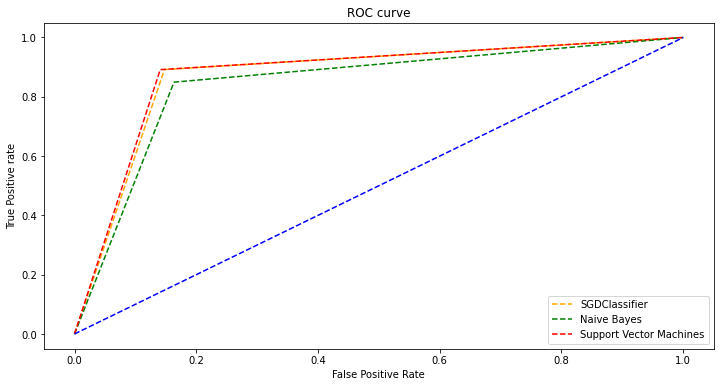

In [ ]:
fig = plt.figure(figsize=(12,6))

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SGDClassifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Support Vector Machines')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In [ ]:
# auc scores
sgd_auc_score = roc_auc_score(y_test, sgd_new_predict)
nb_auc_score = roc_auc_score(y_test, nb_new_predict)
svm_auc_score = roc_auc_score(y_test, svm_new_predict)

print("AUC score for SGDClassifier:{:.2f}%".format(sgd_auc_score*100))
      
print("AUC score for Naive Bayes:{:.2f}%".format(nb_auc_score*100))

print("AUC score for Support Vector Machines:{:.2f}%".format(svm_auc_score*100))

AUC score for SGDClassifier:87.20%
AUC score for Naive Bayes:84.29%
AUC score for Support Vector Machines:87.53%


With this AUC-ROC matrix evaluation, we can further conclude our finding that SGDClassifier, Naive Bayes: MultinomialNB and Support Vector Machines are consider great model to use for training and predict the sentiments given Polar Movie Reviews dataset here. <br>
<br>
We can see that SGD and SVM are pretty close on their performance and now SVM is being the top model among the 3 models and SGD comes in second. While Naive Bayes: MultinomialNB is not doing bad but it is not as great as the other 2 models by approximately 3% lesser.

---

## Summary & Conclusions

This dataset is very challenging yet for my first NLP exercise. It is not because it is a large dataset (original 50000 rows). Instead, this dataset's information and features/elements might be too little to have a better deep-dive training for predictions.

- Dataset
    -  Only 2 columns are available
        - If the dataset can includes a little more information such as age range, ratings, breakdown of questions to allow target audiences to share their reviews in a better structure instead of cluttered all under 1 column as "review".
        
- Challenges
    - Because there are only 2 columns in the dataset, the dependency of the training is mainly on words/texts of the movie reviews. 
    - Words/Texts can be ambiguous
        - Some may use extreme words to express their joy, happiness, positive while some of these words could mean the opposite(negative meanings)
        - Different cultures, age groups, and individuals may express their thoughts differently. This may also confuse our model training as the words they used can also be the opposite of what the default library for inspection thinks.
        
Therefore, I think the dataset can be improved with some more information, which could help us group the data better to help narrow down and set our model training parameters accordingly. It may enhance the model training and make it less heavy to run the computations.
#### Overall, we can still conclude that all 3 required models for this training exercise are actually a great model and performing pretty well that they gets at least above 80%+ of its accuracy scores. **Support Vector Machines** being the **<ins>best</ins>** model and **SGDClassifier** model also can be use in the event like my experience SVM is unable to run smoothly due to hardware limitation.